In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics

In [ ]:
#here the neccessary libraries are imported according to the project

In [219]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#imported warnings and filter them for the warning free flow in between the project

In [220]:
data = pd.read_csv("advertising.csv")

In [ ]:
#using pandas we read all the records from the csv.file given in the statement

# BASIC CHECK

In [ ]:
#these step invovles in basic checks like head,tail,info,describe,shape,null_values 

In [221]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [222]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [224]:
data.shape

(200, 4)

In [225]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [226]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# EDA

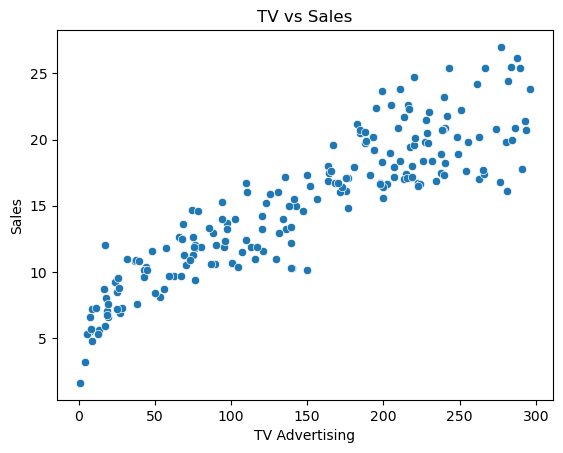

In [227]:
sns.scatterplot(x=data['TV'], y = data['Sales'])
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.show()

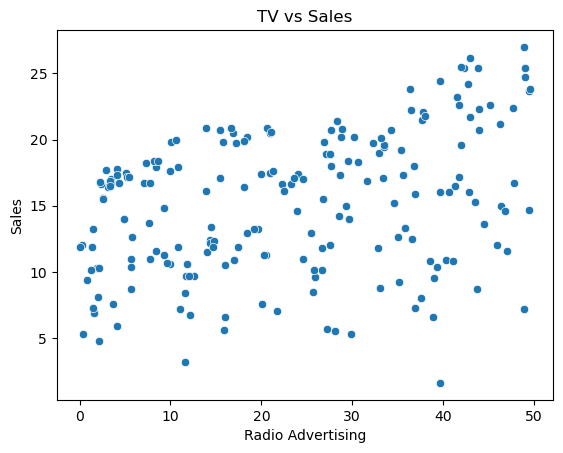

In [228]:
sns.scatterplot(x=data['Radio'], y = data['Sales'])
plt.xlabel("Radio Advertising")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.show()

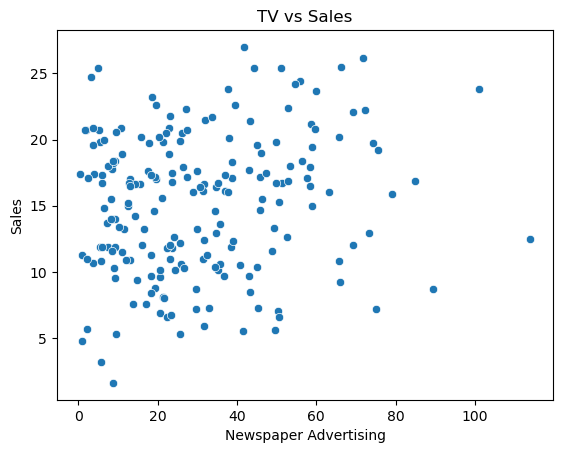

In [229]:
sns.scatterplot(x=data['Newspaper'], y = data['Sales'])
plt.xlabel("Newspaper Advertising")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.show()
plt.show()

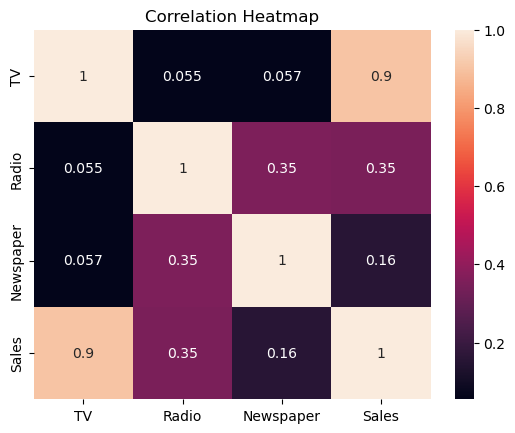

In [230]:
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [231]:
# The EDA steps involving the defining the relationship among tv,newspaper,radio with sales
# tv has direct relationship with sale 
# coming to sale :   TV > RADIO > NEWSPAPER

# Feature Selection

In [232]:
x = data[['TV','Radio','Newspaper']]

In [233]:
y = data[['Sales']]

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [236]:
print(x_train.shape)  #same for y_train and y_test
print(x_test.shape)

(160, 3)
(40, 3)


In [ ]:
# here we applied train_test_split type data diving and using them as train_data and test_data with 80% data and 20% data respectivly.

# model building 

In [237]:
#linear regression 

In [238]:
from sklearn.linear_model import LinearRegression

In [239]:
model = LinearRegression()

In [240]:
model.fit(x_train,y_train)

LinearRegression()

In [241]:
y_pred = model.predict(x_test)

In [242]:
y_pred.shape

(40, 1)

In [243]:
from sklearn.metrics import r2_score

In [244]:
r2_score(y_test,y_pred)

0.9059011844150826

In [245]:
#decision tree 

In [246]:
from sklearn.tree import DecisionTreeRegressor

In [247]:
model = DecisionTreeRegressor()

In [248]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [249]:
y_cap = model.predict(x_test)

In [250]:
from sklearn.metrics import r2_score

In [251]:
r2_score(y_test,y_cap)

0.9090080935630123

In [252]:
#Random forest

In [253]:
from sklearn.ensemble import RandomForestRegressor

In [254]:
model = RandomForestRegressor()

In [255]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [256]:
y_cap = model.predict(x_test)

In [257]:
from sklearn.metrics import r2_score

In [258]:
r2_score(y_test,y_cap)

0.9518279284556213

In [259]:
#svm

In [260]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)

svr_pred = svr.predict(x_test)
print("SVR R2:", r2_score(y_test, svr_pred))

SVR R2: 0.886764963148391


# Evaluation

In [261]:
#testing the model with new data

In [262]:
#test-1

In [263]:
new_record = [[200, 40, 15]]

In [264]:
predicted_sales = model.predict(new_record)
print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 21.088999999999988


In [265]:
#test-2

In [271]:
new_data = pd.DataFrame({
    'TV': [800],
    'Radio': [80],
    'Newspaper': [30]
})

prediction = model.predict(new_data)
print("Predicted Sales:", prediction[0])

Predicted Sales: 26.083000000000013


In [ ]:
# these are the sales when a new record is added in the file that is 